# Unveiling Online Stress: Predictive Analysis of Social Media Content 

Dataset: https://www.kaggle.com/datasets/kreeshrajani/human-stress-prediction

In [ ]:
!pip install wordcloud
!pip install nltk
!pip install gensim
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install allennlp
!pip install --upgrade google-cloud-storage



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 kB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.2/594.2 kB 92.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 111.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Word2Vec Embedding
import gensim
from gensim.models import Word2Vec
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2

# Evaluation metrics
from sklearn.metrics import f1_score, precision_score, recall_score

# For Logistic Regression model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# For Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# For SVC
from sklearn.svm import SVC

2023-12-01 09:01:31.501568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 09:01:31.619812: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-01 09:01:31.619841: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-01 09:01:31.639584: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 09:01:34.093788: W tensorflow/stream_executor/platform/de

# Exploratory Data Analysis

In [ ]:
df = pd.read_csv("Combined_Data.csv")

In [ ]:
df.head()

,Categorization,Body,Label
0,Envy to other is swallowing me,"Im from developingcountry, Indonesia , and for...",1
1,Nothin outta the ordinary. Paradise. Job stres...,Um hello ....well many can relate im sure. Aft...,1
2,Almost 49 and the chasm of emptiness has never...,I’ve been diagnosed severe bi polar where you ...,1
3,I’m happy again,"After my closest friend left me in April, I ha...",0
4,Is it possible to recover from such a traumati...,"I am only 15, and yet I feel my life is alread...",1


In [ ]:
# df = pd.read_csv("Stress.csv")
# df.head()

In [ ]:
df.shape

(14371, 3)

In [ ]:
df.isna().sum()

Categorization    6
Body              0
Label             0
dtype: int64

In [ ]:
# Drop rows with NaN values in place
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Categorization    0
Body              0
Label             0
dtype: int64

In [ ]:
label = df['Label']
label.value_counts()

1    8526
0    5839
Name: Label, dtype: int64

### Text Length Analysis (Number of characters in each text)

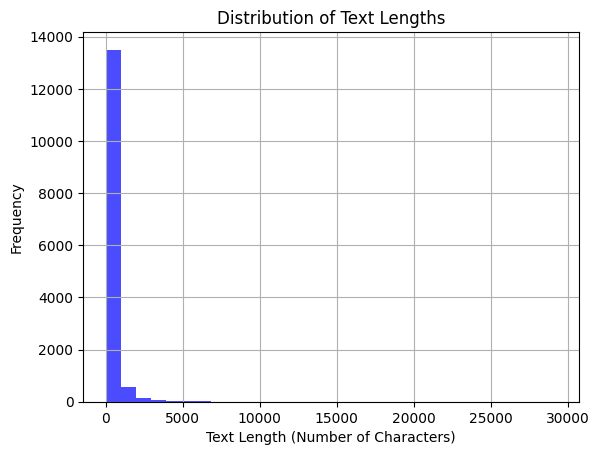

In [ ]:
text_lengths = df['Body'].str.len()

plt.hist(text_lengths, bins=30, color='blue', alpha=0.7)
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.grid(True)
plt.show()

### 

### Text Length Analysis (Number of words in each text)

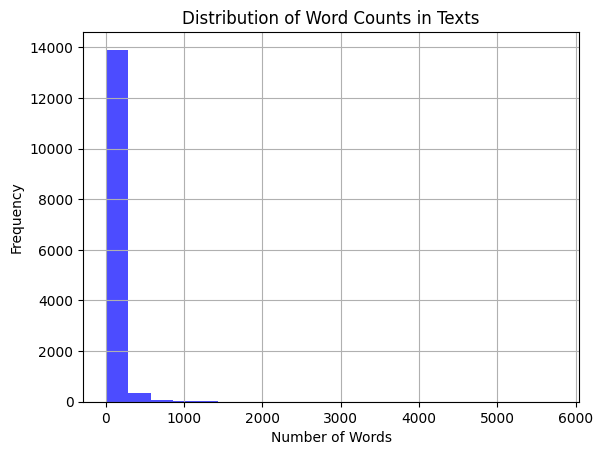

In [ ]:
word_counts = [len(text.split()) for text in df['Body']]

plt.hist(word_counts, bins=20, color='blue', alpha=0.7)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Texts')
plt.grid(True)
plt.show()

### Number of words in each class

number of words in stressed:  710212
number of words in not stressed:  276369
total number of words:  986581


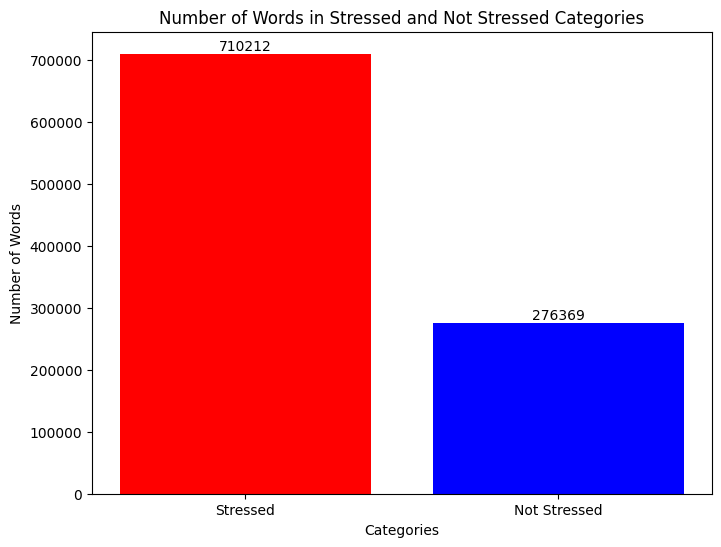

In [ ]:
text_len_stressed=df[df['Label']==1]['Body'].str.split().map(lambda x: len(x)).sum()
text_len_notstressed=df[df['Label']==0]['Body'].str.split().map(lambda x: len(x)).sum()
text_len_total = text_len_stressed + text_len_notstressed
print(f'number of words in stressed: ', text_len_stressed)
print(f'number of words in not stressed: ', text_len_notstressed)
print(f'total number of words: ', text_len_total)

categories = ['Stressed', 'Not Stressed']
word_counts = [text_len_stressed, text_len_notstressed]

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, word_counts, color=['red', 'blue'])
plt.xlabel('Categories')
plt.ylabel('Number of Words')
plt.title('Number of Words in Stressed and Not Stressed Categories')

# Display the numbers on top of each bar
for i, count in enumerate(word_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Show the chart
plt.show()

### Average length of words

In [ ]:
# Average length of words
average_length = np.mean(df["Body"].apply(lambda x: np.mean([len(word) for word in x.split()])))
print(average_length)


5.19784971795794


### Frequency of Stopwords and Common Words

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
corpus = []
new = df['Body'].str.split()
new = new.values.tolist()
corpus = [word.lower() for text in new for word in text]

stop = set(stopwords.words('english'))
# punctuation = list(string.punctuation)
# stop.update(punctuation)

stopword_freq = {}
commonWord_freq = {}
for word in corpus:
    if word in stop:
        if word in stopword_freq:
            stopword_freq[word]+=1
        else:
            stopword_freq[word] = 1

    else:
        if word in commonWord_freq:
            commonWord_freq[word]+=1
        else:
            commonWord_freq[word] = 1

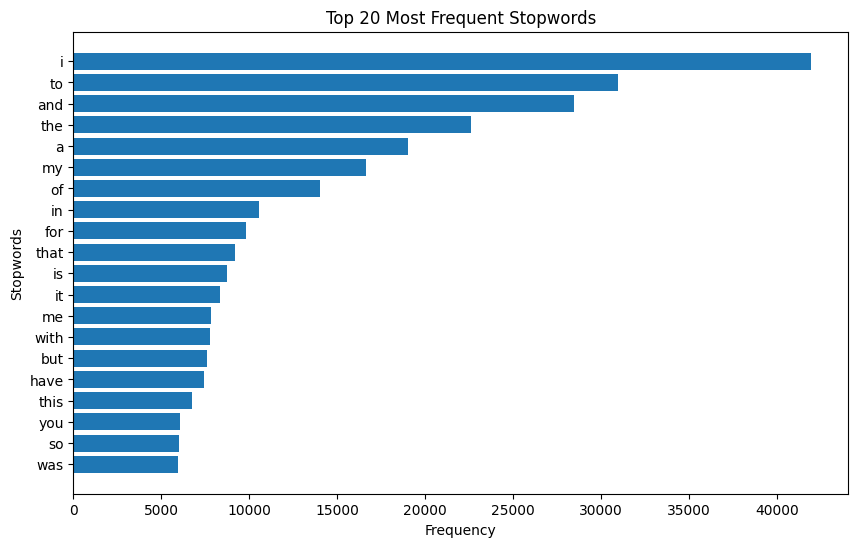

In [ ]:
stopword_freq_df = pd.DataFrame.from_dict(stopword_freq, orient='index', columns=['Frequency'])

stopword_freq_df = stopword_freq_df.sort_values(by='Frequency', ascending=False)

top_n = 20  # top _ stop words
top_n_stopwords_df = stopword_freq_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_n_stopwords_df.index, top_n_stopwords_df['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Stopwords')
plt.title(f'Top {top_n} Most Frequent Stopwords')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most frequent stopwords at the top
plt.show()

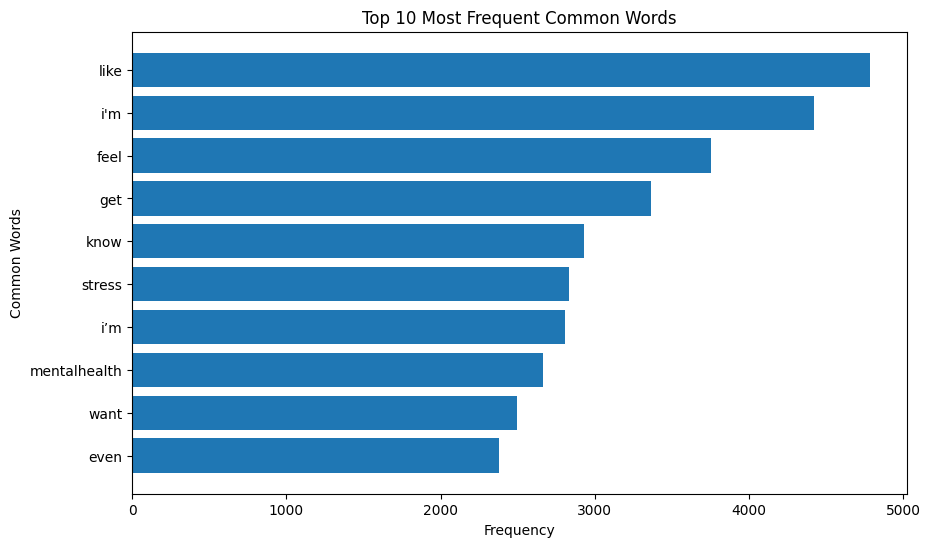

In [ ]:
commonWord_freq_df = pd.DataFrame.from_dict(commonWord_freq, orient='index', columns=['Frequency'])

commonWord_freq_df = commonWord_freq_df.sort_values(by='Frequency', ascending=False)

top_n = 10  # top _ stop words
top_n_commonWord_df = commonWord_freq_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_n_commonWord_df.index, top_n_commonWord_df['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Common Words')
plt.title(f'Top {top_n} Most Frequent Common Words')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most frequent stopwords at the top
plt.show()

In [ ]:
### finding most common words
from collections import Counter
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.Body)

counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'I': 38576,
 'to': 30543,
 'and': 27280,
 'the': 20838,
 'a': 18493,
 'my': 14872,
 'of': 13880,
 'in': 10111,
 'for': 9418,
 'that': 8908}

### Word Frequency Analysis - Wordclouds

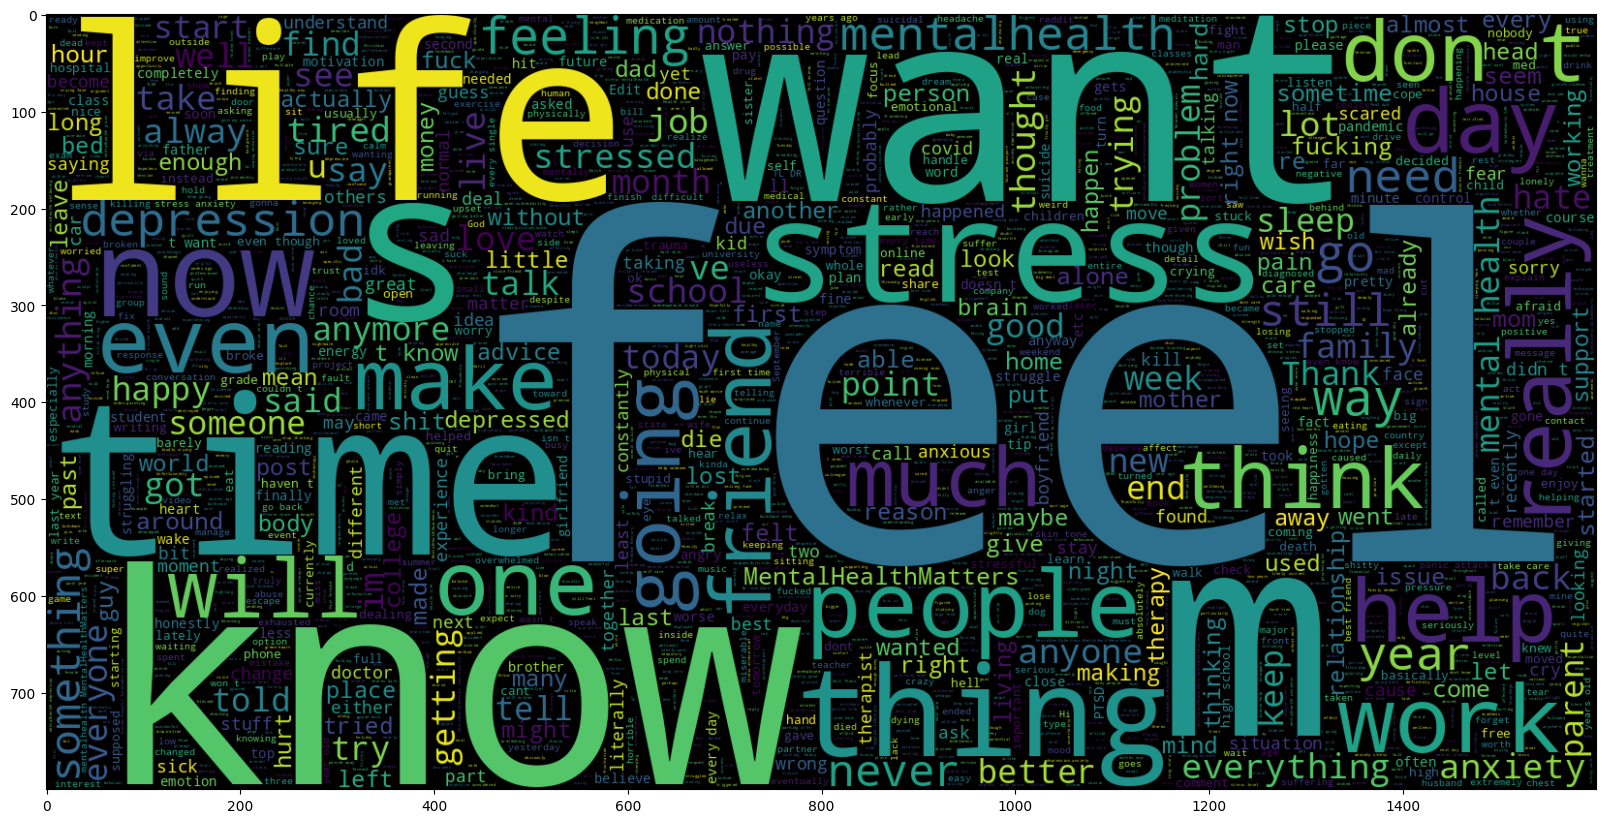

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.Label == 1].Body))
plt.imshow(wc , interpolation = 'bilinear')

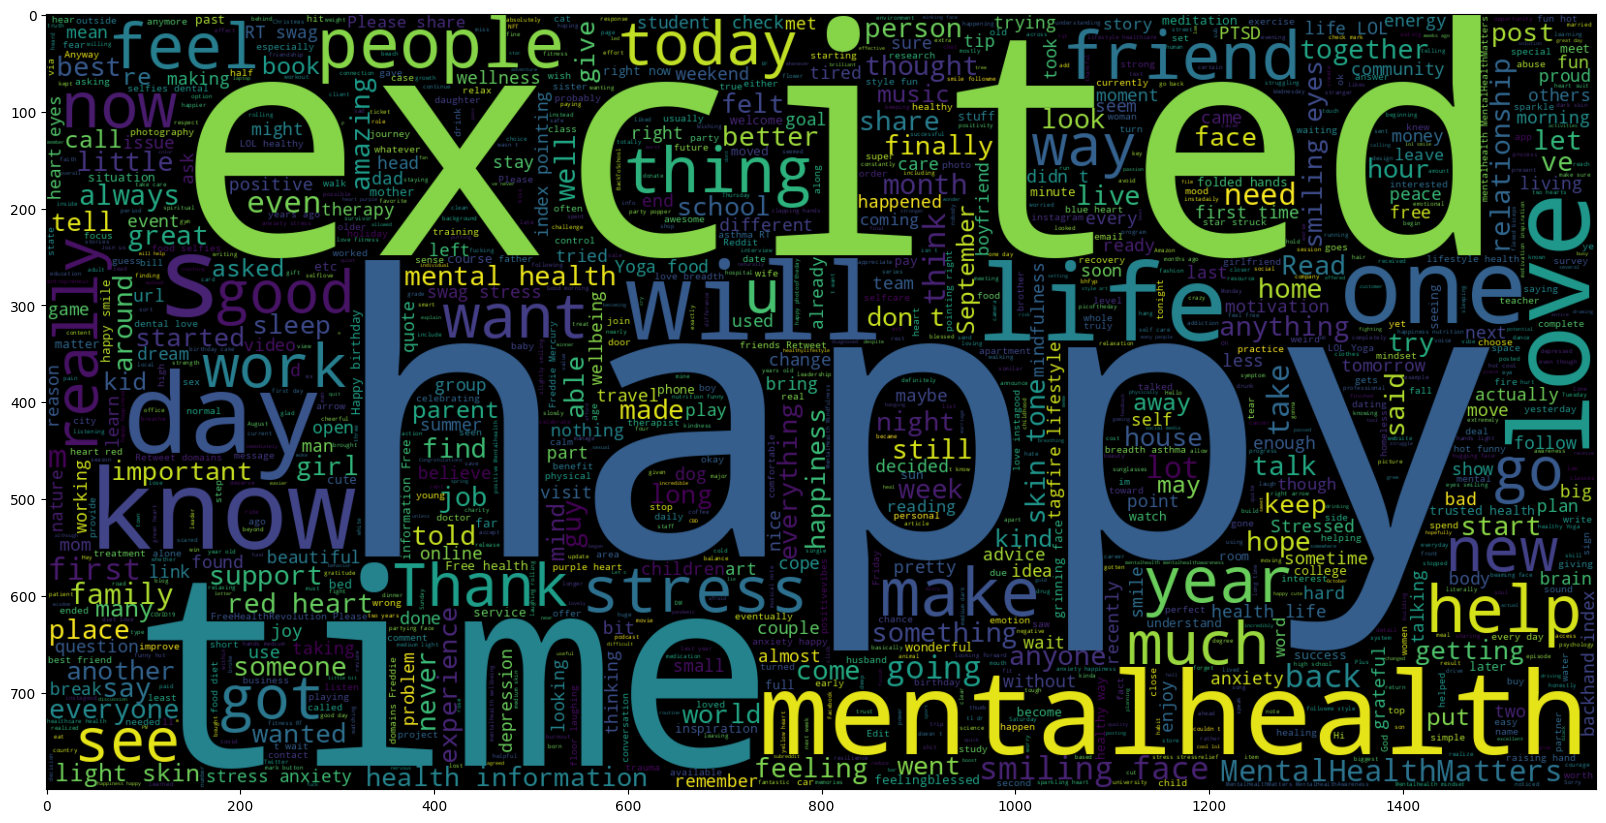

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.Label == 0].Body))
plt.imshow(wc , interpolation = 'bilinear')

## N-gram Analysis

In [ ]:
### setting up n-gram function
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### Unigram

<AxesSubplot: >

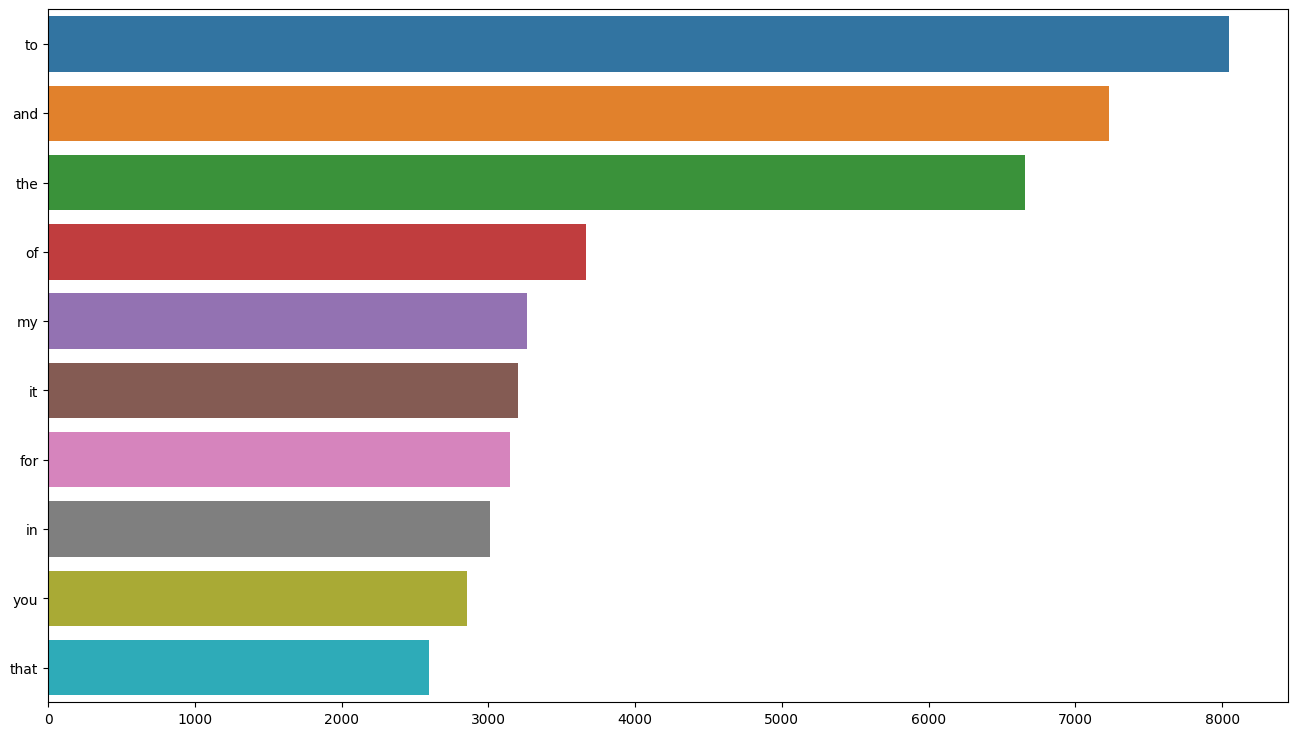

In [ ]:
# for not stressed
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df[df.Label == 0].Body,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<AxesSubplot: >

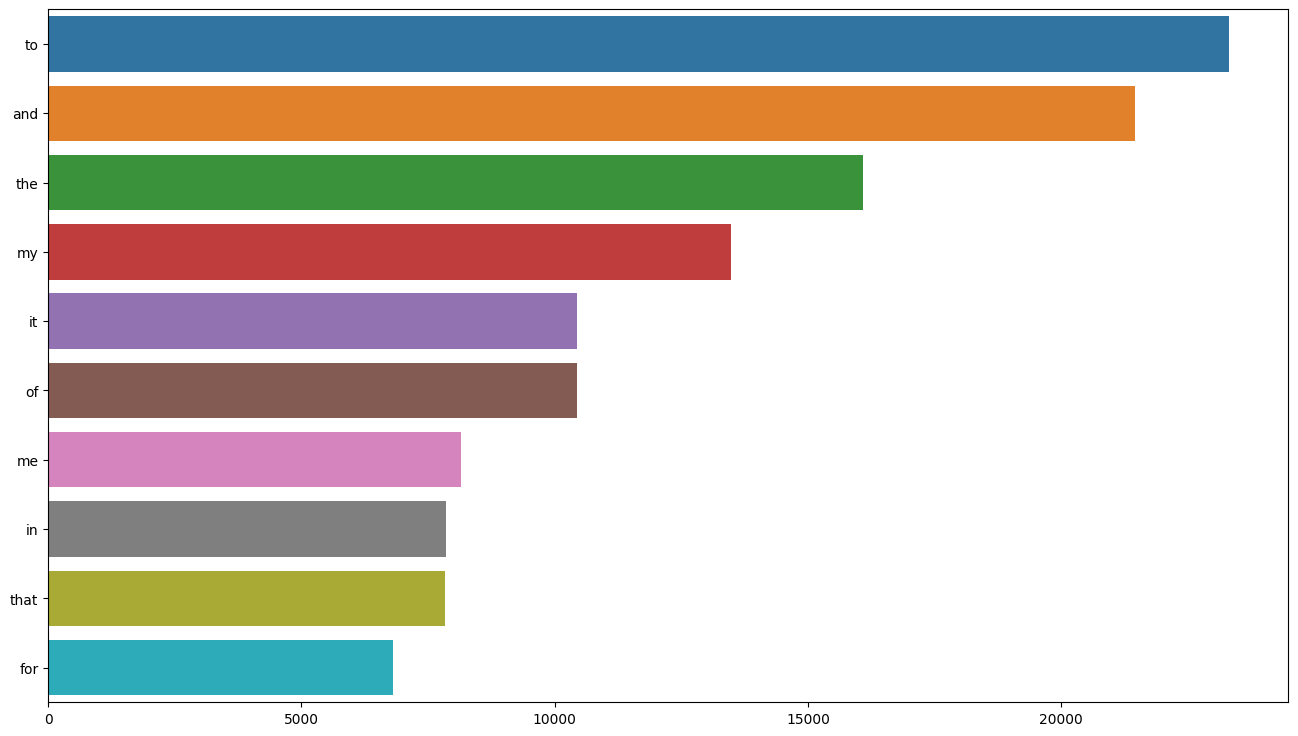

In [ ]:
# for stressed
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df[df.Label == 1].Body,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

### Bigram

<AxesSubplot: >

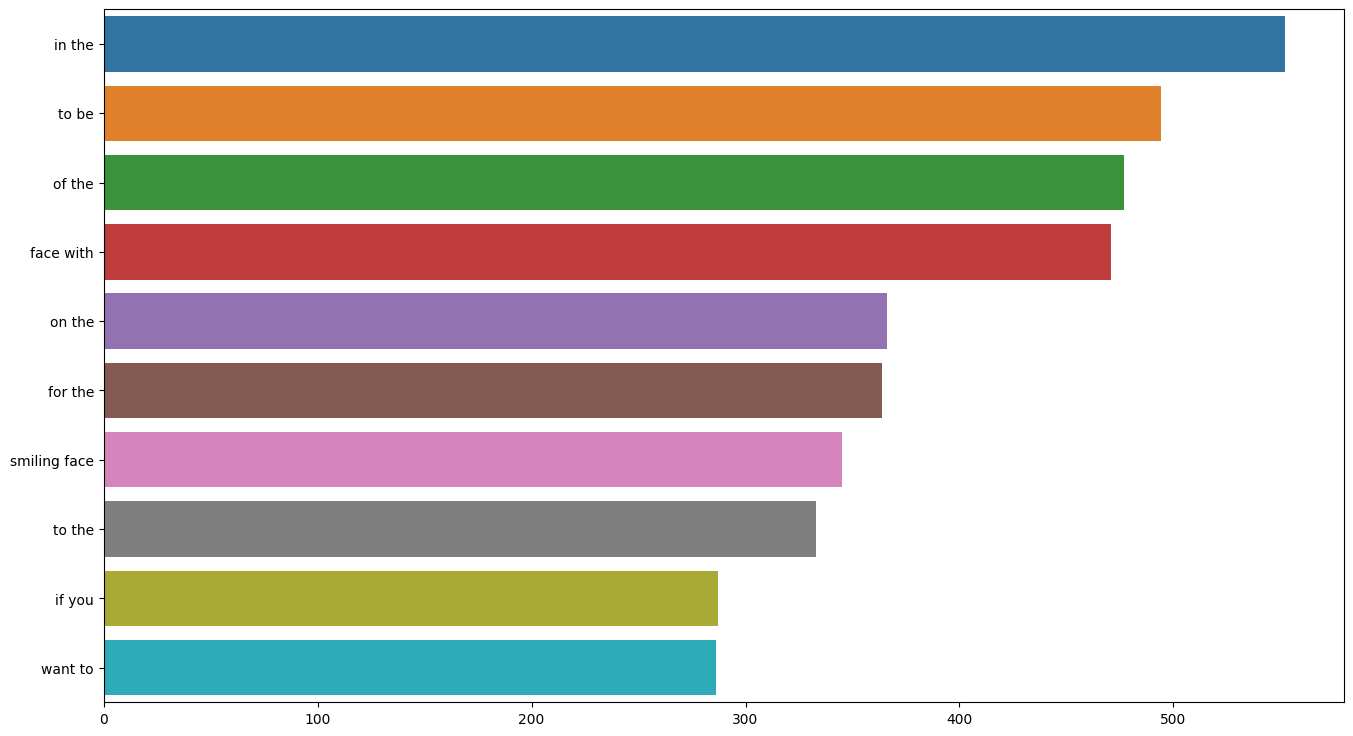

In [ ]:
# for not stressed
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df[df.Label == 0].Body,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

<AxesSubplot: >

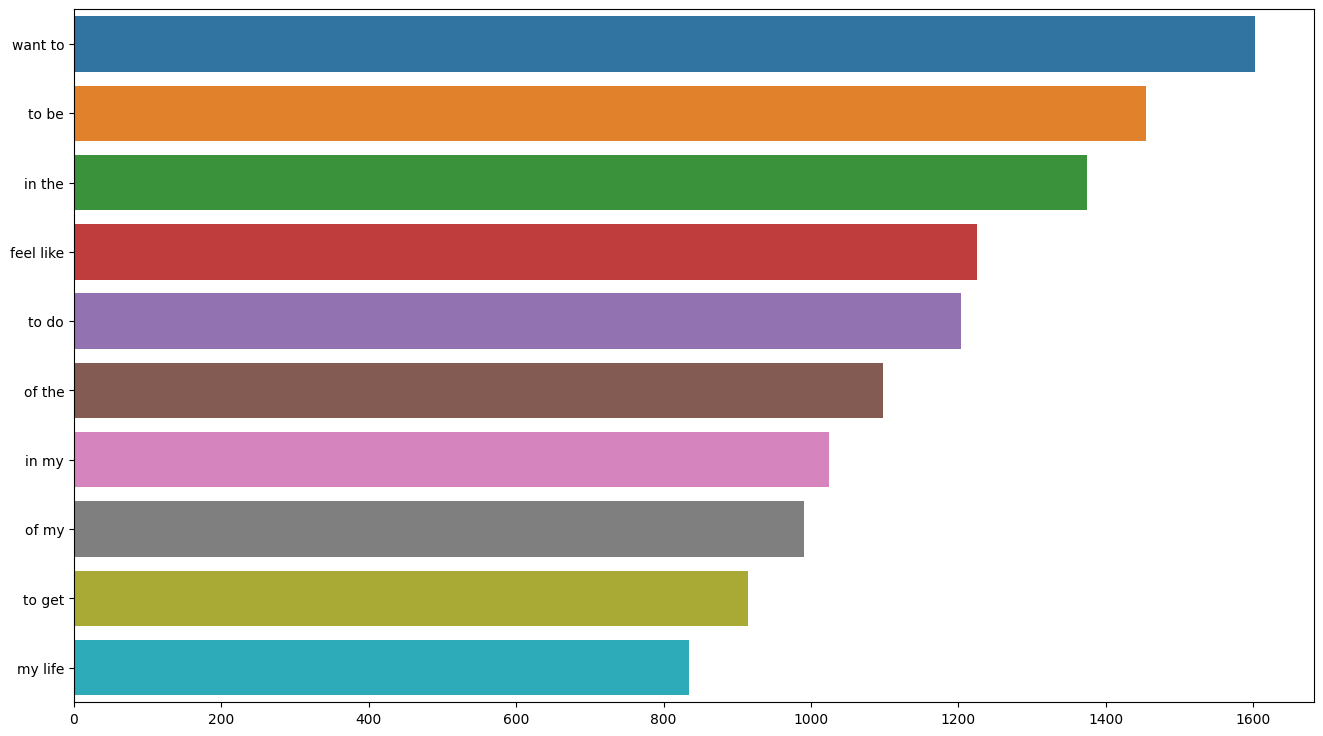

In [ ]:
# for stressed
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df[df.Label == 1].Body,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

### Trigram

<AxesSubplot: >

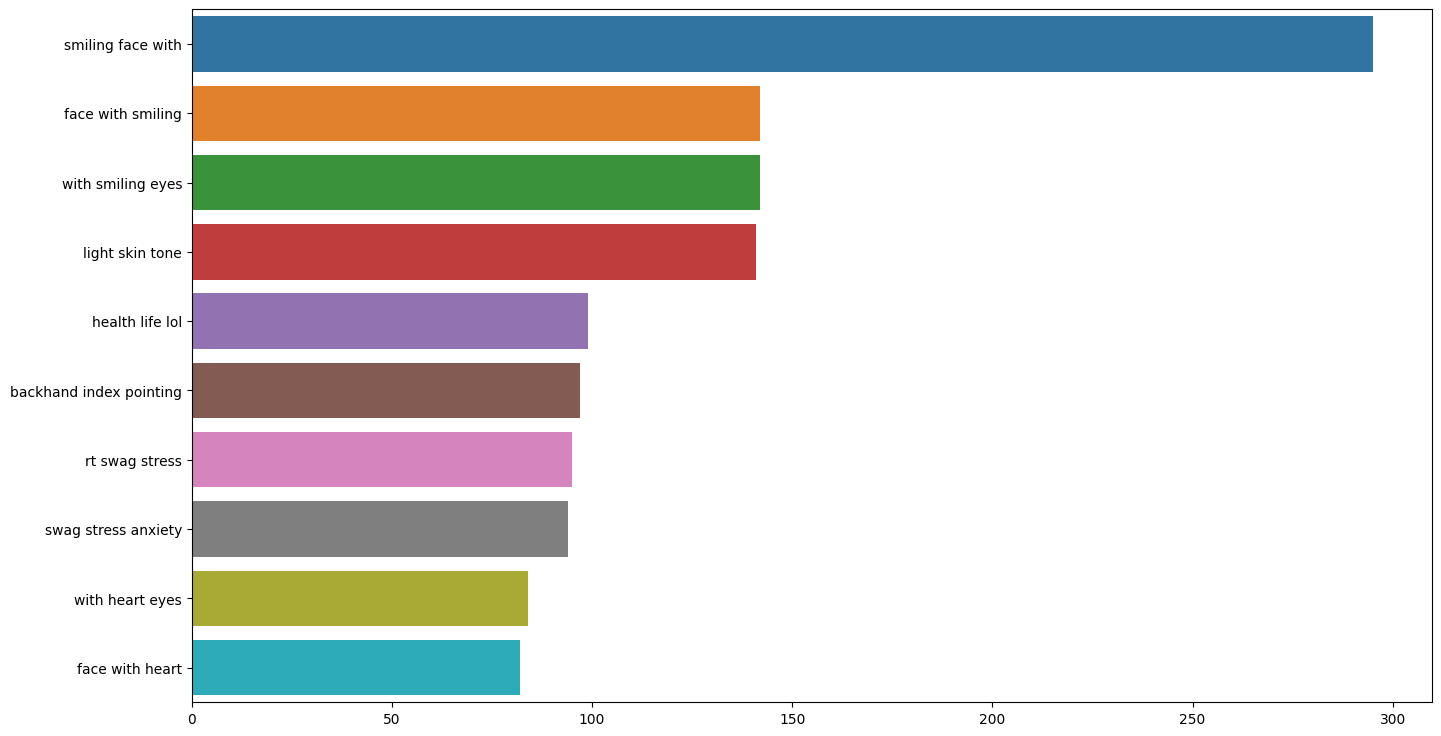

In [ ]:
# for not stressed
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df[df.Label == 0].Body,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

<AxesSubplot: >

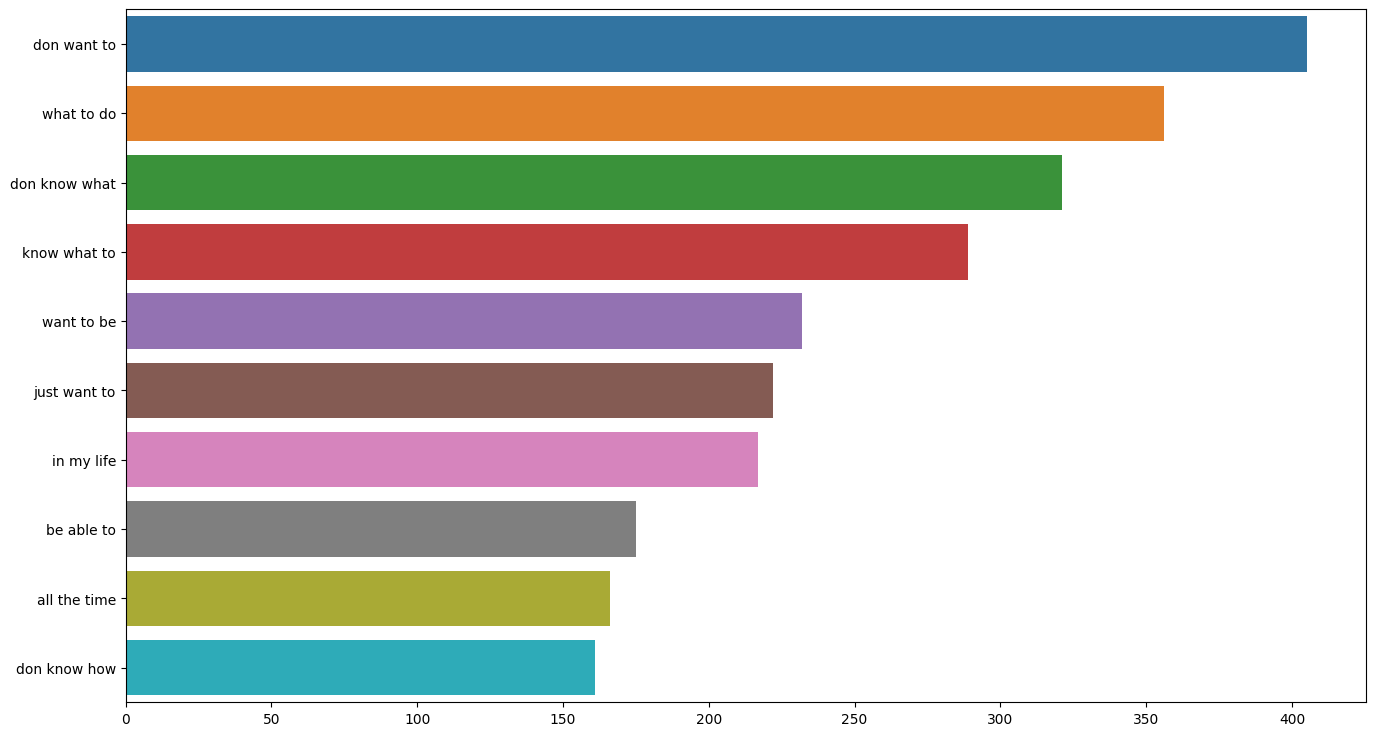

In [ ]:
# for stressed
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df[df.Label == 1].Body,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

In [ ]:
# df.subreddit.value_counts()

# Data Preprocessing

### Text Cleaning

In [ ]:
# def preprocess_text(text):
#     # Convert to lowercase
#     lowercased_text = text.lower()

#     # Remove punctuation using string.punctuation
#     cleaned_text = "".join(
#         char for char in lowercased_text if char not in string.punctuation
#     )

#     return cleaned_text


# df["text"] = df["text"].apply(preprocess_text)


In [ ]:
punctuation = list(string.punctuation) # default punctuation in string object

# retrieve all the punctuation that are not in the default punctuation in string object
unique_chars = set()

def retrieve_non_default_punctuations(text):
    for char in text:
        if (
            char not in string.punctuation and
            char not in string.ascii_letters and
            char not in string.whitespace and
            char not in string.digits
        ):
            unique_chars.add(char)

df["Body"].apply(retrieve_non_default_punctuations)
print("Unique characters: ")
print(unique_chars)

# Convert the set of unique characters to a list
unique_chars_list = list(unique_chars)

# Add the unique characters to the default punctuation list
punctuation += unique_chars_list

# Now, 'punctuation' contains the default punctuation plus the unique characters
print("\nAll punctuations present in df:")
print(punctuation)

Unique characters: 
{'❞', 'छ', '𝕜', 'ウ', '\u2069', 'ے', '症', 'ы', '𝐚', 'ë', '𝟰', '𝗼', '𝗵', '𝓎', '🇻', '失', '…', 'س', 'з', 'บ', '\u200a', '🥕', '🐰', 'ь', 'ム', '𝘀', 'ो', '𝐜', '—', 'و', '𝐈', '🅔', 'ᴗ', '𝐛', 'í', '˚', '스', '🇼', '처', '\u200d', '𝓇', 'ᵕ', '̩', '\u200b', 'т', '❤', 'ح', '❝', '𝕦', 'ی', 'ए', '𝐨', '𝗦', 'г', 'ن', '👩', '●', '𝐡', 'с', '\U000d0062', '𝐃', '“', 'ظ', '̀', '𝑔', '₹', '🅢', '𝐌', '출', '𝐒', '🅑', '요', '𝗳', 'ö', 'ั', '𝒽', 'ス', '𝕒', '🇦', '𝒻', '🅓', '𝐤', '𝐿', '𝗽', 'े', '•', 'م', '์', '𝐄', '・', 'ッ', 'ी', '่', 'ī', '𝕠', 'ハ', 'د', '𝗙', '🅝', '出', 'เ', '♤', '𝐘', 'ج', '\ufeff', 'न', '洲', 'ィ', '\u2063', '˂', 'е', 'ب', '▸', '』', '⌯', '𝗱', 'ھ', '랑', '🅤', '🇸', '😔', '피', '💕', '́', 'ा', '𝐬', 'л', 'उ', '🅖', 'ه', '½', '’', '𝐯', '🇪', 'а', '𝕡', '𝗟', '𝐩', '♫', 'ํ', 'र', '𝗘', 'х', 'п', '𝓀', '𝕪', 'ボ', '𝓂', '사', 'ネ', '𝐮', '𝕟', 'ت', '𝕨', 'ä', 'ñ', '𝗤', '²', '𝕚', 'ラ', 'ド', '\U000d007f', '🅐', '𝔸', 'Ф', 'α', '✓', '↓', '𝐢', 'к', '´', 'ر', '민', '⠀', '\u2066', '𝗧', '€', '→', '𝟳', '🇱', 'в', '：', 'ʻ', '𝐠', '𝕣', '

In [ ]:
# Modified to use for Combined_Data.csv
def preprocess_text(text):
    # Convert to lowercase
    lowercased_text = text.lower()

    # Remove punctuation
    cleaned_text = "".join(
        char for char in lowercased_text if char not in punctuation
    )

    return cleaned_text


df["Cleaned Text"] = df["Body"].apply(preprocess_text)

In [ ]:
df.head()

,Categorization,Body,Label,Cleaned Text
0,Envy to other is swallowing me,"Im from developingcountry, Indonesia , and for...",1,im from developingcountry indonesia and for n...
1,Nothin outta the ordinary. Paradise. Job stres...,Um hello ....well many can relate im sure. Aft...,1,um hello well many can relate im sure after to...
2,Almost 49 and the chasm of emptiness has never...,I’ve been diagnosed severe bi polar where you ...,1,ive been diagnosed severe bi polar where you n...
3,I’m happy again,"After my closest friend left me in April, I ha...",0,after my closest friend left me in april i hav...
4,Is it possible to recover from such a traumati...,"I am only 15, and yet I feel my life is alread...",1,i am only 15 and yet i feel my life is already...


In [ ]:
# df.iloc[2]['Body']

# print("’" in punctuation)

### Removing Stopwords

In [ ]:
stop = set(stopwords.words('english'))

stop.update(punctuation)

In [ ]:
#Removing the stopwords from text
wnl = WordNetLemmatizer()
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df["Cleaned Text"] = df["Cleaned Text"].apply(remove_stopwords)

In [ ]:
df.head()

,Categorization,Body,Label,Cleaned Text
0,Envy to other is swallowing me,"Im from developingcountry, Indonesia , and for...",1,im developingcountry indonesia temporary work ...
1,Nothin outta the ordinary. Paradise. Job stres...,Um hello ....well many can relate im sure. Aft...,1,um hello well many relate im sure today im con...
2,Almost 49 and the chasm of emptiness has never...,I’ve been diagnosed severe bi polar where you ...,1,ive diagnosed severe bi polar longer even get ...
3,I’m happy again,"After my closest friend left me in April, I ha...",0,closest friend left april finally let go reali...
4,Is it possible to recover from such a traumati...,"I am only 15, and yet I feel my life is alread...",1,15 yet feel life already pit emptiness stomach...


### Lemmatization

###### Examples
###### there are different parts of speech (pos) to lemmatise
#####
###### 1. Noun (pos = 'n'):
###### - "cats" -> "cat"
###### - "dogs" -> "dog"
###### - "books" -> "book"
#####
###### 2. Verb (pos = 'v')
###### - "running" -> "run"
###### - "eating" -> "eat"
###### - "swimming" -> "swim"
#####
###### 3. Adjectives (pos = "a")
###### - better -> "good"
###### - "happier" -> 'happy'
###### - "brighter" -> "bright"


In [ ]:
#testing with examples

word_to_lemmatize = "brighter"
wnl = WordNetLemmatizer()
lemmatized_word = wnl.lemmatize(word_to_lemmatize, pos='a')
print(f"Lemmatizing '{word_to_lemmatize}' to '{lemmatized_word}'")


Lemmatizing 'brighter' to 'bright'


In [ ]:
#lemmatization. That is, we get the roots of the words
df["Cleaned Text with N lemmatization"] = df["Cleaned Text"].apply(
    lambda x: " ".join([wnl.lemmatize(word, pos='n') for word in x.split()]))

In [ ]:
#lemmatization. That is, we get the roots of the words
df["Cleaned Text with V lemmatization"] = df["Cleaned Text"].apply(
    lambda x: " ".join([wnl.lemmatize(word, pos='v') for word in x.split()]))

In [ ]:
#lemmatization. That is, we get the roots of the words
df["Cleaned Text with A lemmatization"] = df["Cleaned Text"].apply(
    lambda x: " ".join([wnl.lemmatize(word, pos='a') for word in x.split()]))

In [ ]:
df.head()

,Categorization,Body,Label,Cleaned Text,Cleaned Text with N lemmatization,Cleaned Text with V lemmatization,Cleaned Text with A lemmatization
0,Envy to other is swallowing me,"Im from developingcountry, Indonesia , and for...",1,im developingcountry indonesia temporary work ...,im developingcountry indonesia temporary work ...,im developingcountry indonesia temporary work ...,im developingcountry indonesia temporary work ...
1,Nothin outta the ordinary. Paradise. Job stres...,Um hello ....well many can relate im sure. Aft...,1,um hello well many relate im sure today im con...,um hello well many relate im sure today im con...,um hello well many relate im sure today im con...,um hello well many relate im sure today im con...
2,Almost 49 and the chasm of emptiness has never...,I’ve been diagnosed severe bi polar where you ...,1,ive diagnosed severe bi polar longer even get ...,ive diagnosed severe bi polar longer even get ...,ive diagnose severe bi polar longer even get g...,ive diagnosed severe bi polar long even get go...
3,I’m happy again,"After my closest friend left me in April, I ha...",0,closest friend left april finally let go reali...,closest friend left april finally let go reali...,closest friend leave april finally let go real...,close friend left april finally let go realize...
4,Is it possible to recover from such a traumati...,"I am only 15, and yet I feel my life is alread...",1,15 yet feel life already pit emptiness stomach...,15 yet feel life already pit emptiness stomach...,15 yet feel life already pit emptiness stomach...,15 yet feel life already pit emptiness stomach...


# Post Text Cleaning Analysis

In [ ]:
# do ngram analysis for each pre and post text cleaning to compare, 
# got some diff
# can throw into slides and report

# just did 1 one below to see, can do the rest later on

<AxesSubplot: >

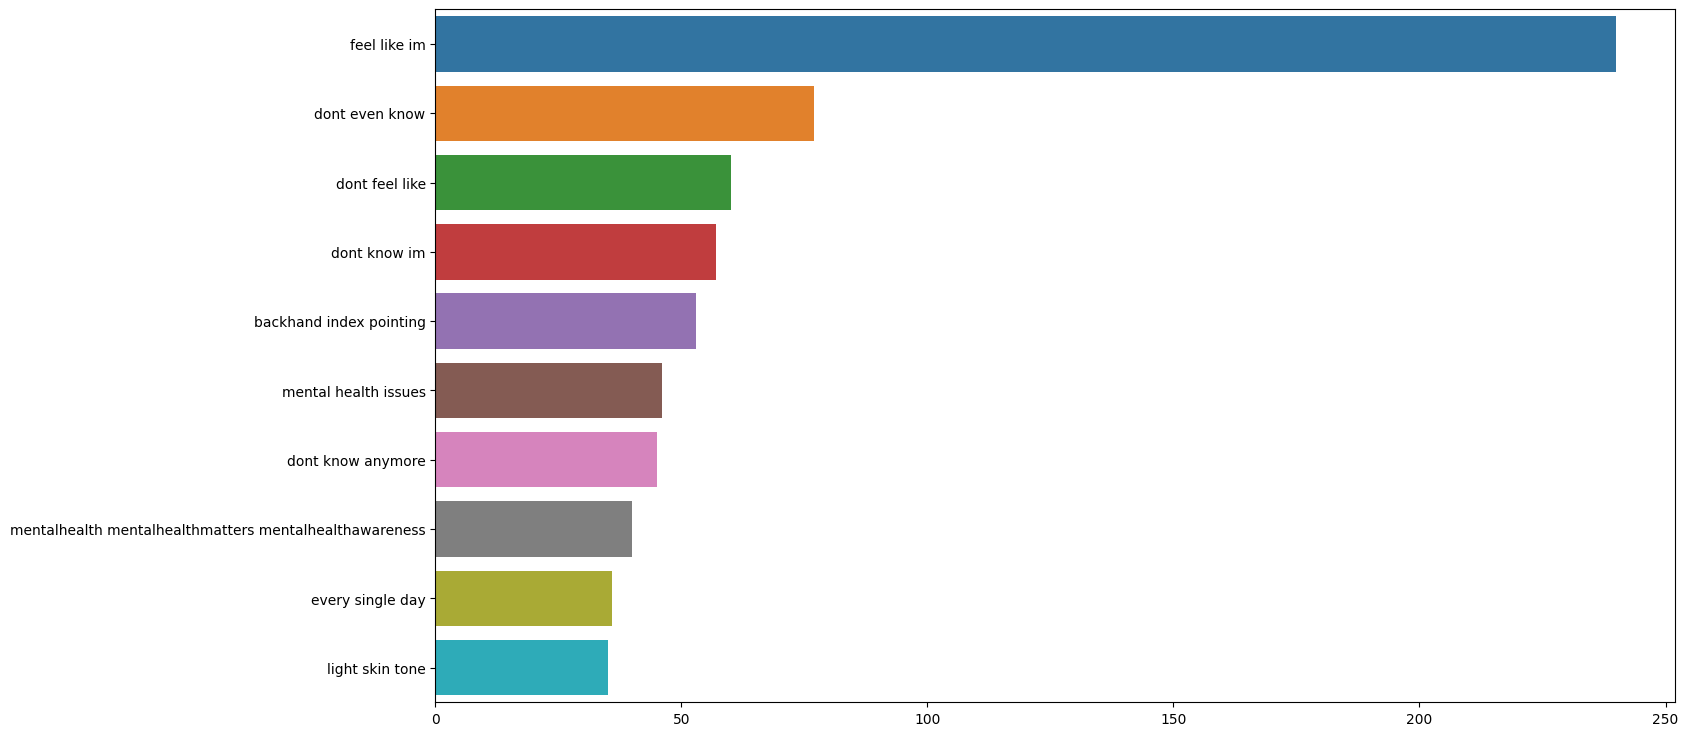

In [ ]:
# for not stressed
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df[df.Label == 1]["Cleaned Text"],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

<AxesSubplot: >

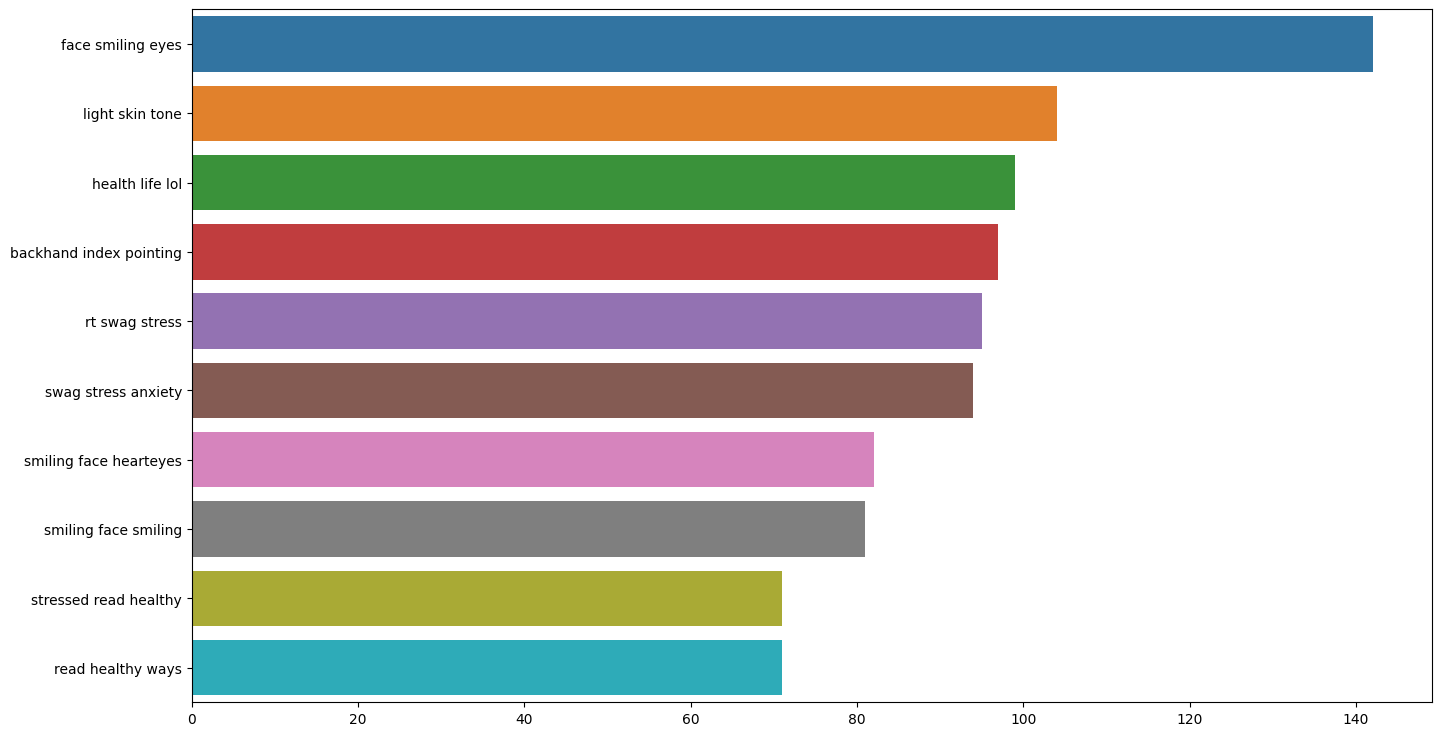

In [ ]:
# for not stressed
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df[df.Label == 0]["Cleaned Text"],10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

# Export Cleaned Data to new CSV

In [ ]:
df.isna().sum()

Categorization                       0
Body                                 0
Label                                0
Cleaned Text                         0
Cleaned Text with N lemmatization    0
Cleaned Text with V lemmatization    0
Cleaned Text with A lemmatization    0
dtype: int64

In [ ]:
# Get cleaned data CSV file
# df.to_csv('cleaned_combined_data.csv', index=False)

## 

## 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=86836953-3695-4d21-9d30-632fe800fb7d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>